In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
Conv2D, MaxPooling2D,
Dense, Dropout, Flatten,
BatchNormalization
)
from keras.src.utils.numerical_utils import to_categorical
import joblib

In [2]:
!pip install keras


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [9]:
train = pd.read_csv('../datasets/mnist/train.csv')
test = pd.read_csv('../datasets/mnist/test.csv')
X_train = train.drop(['label'], axis=1).values
y_train = train['label'].values
X_test = test.values
X_train = X_train.reshape(-1,28,28,1)
X_test = X_test.reshape(-1,28,28,1)
X_train = X_train /255
X_test = X_test/255
y_train = to_categorical(y_train)

label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0          1       0       0       0       0       0       0       0       0   
1          0       0       0       0       0       0       0       0       0   
2          1       0       0       0       0       0       0       0       0   
3          4       0       0       0       0       0       0       0       0   
4          0       0       0       0       0       0       0       0       0   
...      ...     ...     ...     ...     ...     ...     ...     ...     ...   
41995      0       0       0       0       0       0       0       0       0   
41996      1       0       0       0       0       0       0       0       0   
41997      7       0       0       0       0       0       0       0       0   
41998      6       0       0       0       0       0       0       0       0   
41999      9       0       0       0       0       0       0       0       0   

       pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  \
0           0  ...         0         0         0         0         0   
1           0  ...         0         0         0         0         0   
2           0  ...         0         0         0         0         0   
3           0  ...         0         0         0         0         0   
4           0  ...         0         0         0         0         0   
...       ...  ...       ...       ...       ...       ...       ...   
41995       0  ...         0         0         0         0         0   
41996       0  ...         0         0         0         0         0   
41997       0  ...         0         0         0         0         0   
41998       0  ...         0         0         0         0         0   
41999       0  ...         0         0         0         0         0   

       pixel779  pixel780  pixel781  pixel782  pixel783  
0             0         0         0         0         0  
1             0         0         0         0         0  
2             0         0         0         0         0  
3             0         0         0         0         0  
4             0         0         0         0         0  
...         ...       ...       ...       ...       ...  
41995         0         0         0         0         0  
41996         0         0         0         0         0  
41997         0         0         0         0         0  
41998         0         0         0         0         0  
41999         0         0         0         0         0  

[42000 rows x 785 columns]

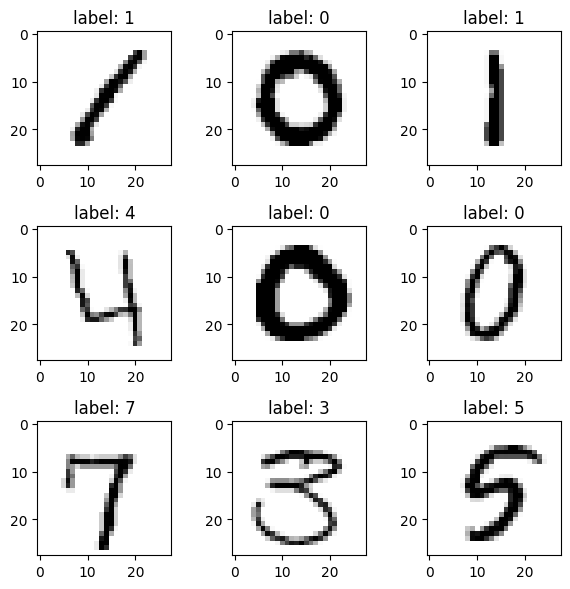

In [15]:
fig, axes = plt.subplots(3, 3, figsize=(6, 6))
for i, ax in enumerate(axes.flat):
    ax.imshow(X_train[i].squeeze(), cmap='binary')
    digit = y_train[i].argmax()
    ax.set(title = f"label: {digit}")
    fig.tight_layout()


In [17]:
def get_model():
    model=Sequential()
    model.add(Conv2D(filters=64, kernel_size = (3,3), activation="relu",input_shape=(28,28,1)))
    model.add(Conv2D(filters=64, kernel_size = (3,3), activation="relu"))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(BatchNormalization())
    model.add(Conv2D(filters=128, kernel_size = (3,3), activation="relu"))
    model.add(Conv2D(filters=128, kernel_size = (3,3), activation="relu"))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(BatchNormalization())
    model.add(Conv2D(filters=256, kernel_size = (3,3), activation="relu"))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Flatten())
    model.add(BatchNormalization())
    model.add(Dense(512,activation="relu"))
    model.add(Dense(10,activation="softmax"))
    model.compile(loss="categorical_crossentropy", optimizer="adam",metrics=["accuracy"])
    return model


In [18]:
tf.random.set_seed(0)
model = get_model()
print(model.summary())


C:\Users\GF LAB\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 24, 24, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 12, 12, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 12, 12, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 10, 10, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 8, 8, 128)           │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 4, 4, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 2, 2, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 1, 1, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │         131,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 692,682 (2.64 MB)

 Trainable params: 691,786 (2.64 MB)

 Non-trainable params: 896 (3.50 KB)

None


In [19]:
history = model.fit(
X_train, y_train,
batch_size = 64,
epochs = 20,
validation_split=.2
)
tf.keras.models.save_model(model,"models/mnist_cnn.h5")
joblib.dump(history.history, "models/mnist_cnn.history")

Epoch 1/20
525/525 ━━━━━━━━━━━━━━━━━━━━ 40s 66ms/step - accuracy: 0.9365 - loss: 0.2083 - val_accuracy: 0.9324 - val_loss: 0.2176
Epoch 2/20
525/525 ━━━━━━━━━━━━━━━━━━━━ 34s 65ms/step - accuracy: 0.9850 - loss: 0.0470 - val_accuracy: 0.9846 - val_loss: 0.0589
Epoch 3/20
525/525 ━━━━━━━━━━━━━━━━━━━━ 34s 66ms/step - accuracy: 0.9907 - loss: 0.0301 - val_accuracy: 0.9812 - val_loss: 0.0728
Epoch 4/20
525/525 ━━━━━━━━━━━━━━━━━━━━ 34s 65ms/step - accuracy: 0.9920 - loss: 0.0268 - val_accuracy: 0.9880 - val_loss: 0.0519
Epoch 5/20
525/525 ━━━━━━━━━━━━━━━━━━━━ 34s 66ms/step - accuracy: 0.9948 - loss: 0.0160 - val_accuracy: 0.9896 - val_loss: 0.0462
Epoch 6/20
525/525 ━━━━━━━━━━━━━━━━━━━━ 34s 65ms/step - accuracy: 0.9937 - loss: 0.0203 - val_accuracy: 0.9876 - val_loss: 0.0551
Epoch 7/20
525/525 ━━━━━━━━━━━━━━━━━━━━ 35s 67ms/step - accuracy: 0.9949 - loss: 0.0178 - val_accuracy: 0.9912 - val_loss: 0.0427
Epoch 8/20
525/525 ━━━━━━━━━━━━━━━━━━━━ 35s 66ms/step - accuracy: 0.9961 - loss: 0.0134 - 

['models/mnist_cnn.history']

In [ ]:
history=history.history

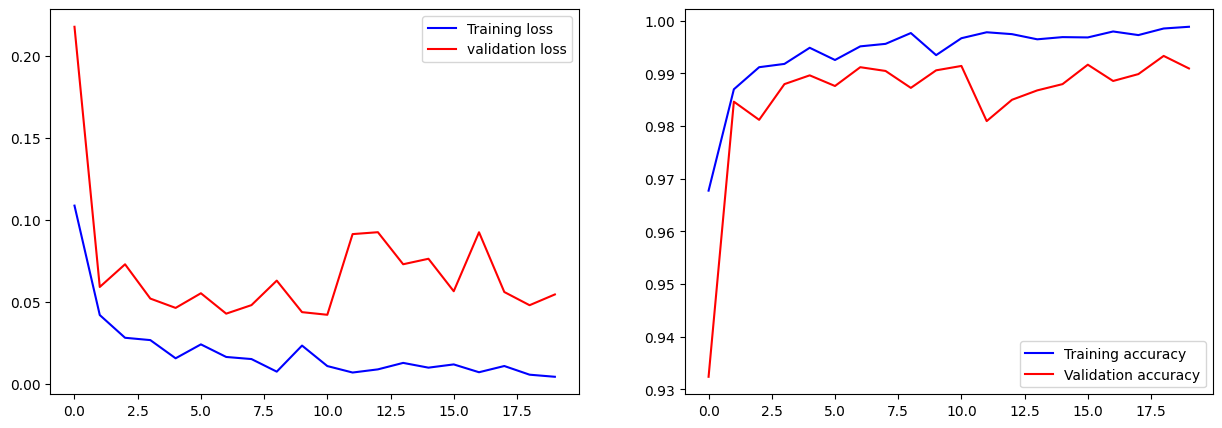

In [32]:

fig, ax = plt.subplots(1,2, figsize=(15,5))
ax[0].plot(history['loss'], color='b', label="Training loss")
ax[0].plot(history['val_loss'], color='r', label="validation loss")
ax[0].legend()
ax[1].plot(history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history['val_accuracy'], color='r',label="Validation accuracy")
ax[1].legend()


In [29]:
history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

875/875 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step


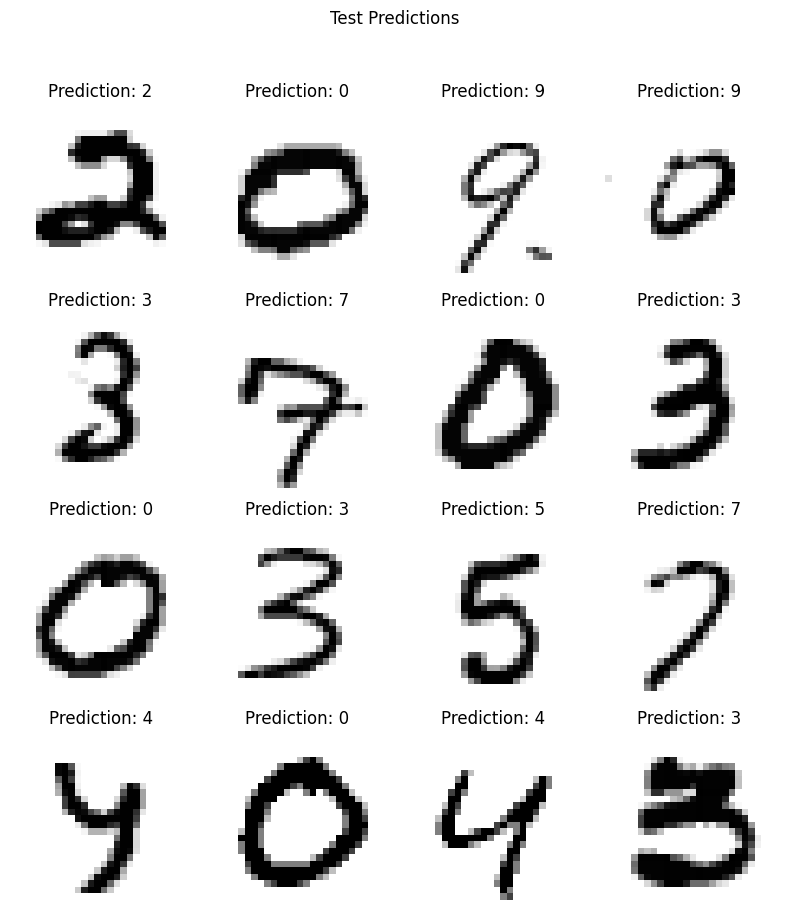

In [33]:
y_pred = model.predict(X_test)
fig, axis = plt.subplots(4, 4, figsize=(8,10))
for i, ax in enumerate(axis.flat):
    ax.imshow(X_test[i].squeeze(), cmap='binary')
    ax.set(title = f"Prediction: {y_pred[i].argmax()}");
    ax.axis("off")
fig.suptitle("Test Predictions")
fig.tight_layout(rect=[0, 0.05, 1, 0.95])